In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

/Users/katyscott/opt/miniconda3/envs/radiogenomics/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/var/folders/71/rrp6j9vj3tv1mc89c__4w9bc0000gn/T/ipykernel_79496/727953073.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [51]:
datasetName = "RADCURE"

In [53]:
negControls = ['', 'shuffled_full_', 'shuffled_roi_', 'shuffled_non_roi_', 'randomized_sampled_full_', 'randomized_sampled_roi_', 'randomized_sampled_non_roi_']

featureSets = {}

for negControl in negControls:
    radFileName =  "radiomicfeatures_" + negControl + datasetName + ".csv"

    inputPath = os.path.join("/Users/katyscott/Documents/HNC Project/data/", datasetName, "total_radiomic_features/", radFileName)
    radiomicData = pd.read_csv(inputPath)

    diagnosticRadiomics = radiomicData.filter(regex=r"diagnostics_*")
    lastDiagnosticIdx = radiomicData.columns.get_loc(diagnosticRadiomics.columns[-1])
    featsOnlyRadiomics = radiomicData.iloc[:, lastDiagnosticIdx+1:]

    if negControl == "":
        featureSets['original'] = featsOnlyRadiomics
        print(featureSets['original'].shape)
    else:
        featureSets[negControl] = featsOnlyRadiomics
        print(featureSets[negControl].shape)


(2994, 1317)
(2994, 1317)
(2994, 1317)
(2994, 1317)
(2994, 1317)
(2994, 1317)
(2994, 1317)


In [54]:
featureSets.keys()

dict_keys(['original', 'shuffled_full_', 'shuffled_roi_', 'shuffled_non_roi_', 'randomized_sampled_full_', 'randomized_sampled_roi_', 'randomized_sampled_non_roi_'])

# Original vs Original correlation analysis

In [79]:
verticalPrefix = "original"
horizontalPrefix = "original"

verticalFeats = featureSets[verticalPrefix]
horizontalFeats = featureSets[horizontalPrefix]

# Get the correlation matrix
combinedFeats = pd.concat([verticalFeats, horizontalFeats], axis=1, names=[verticalPrefix, horizontalPrefix])

In [80]:
correlationMatrix = combinedFeats.corr()

In [81]:
matrix = np.triu(correlationMatrix)

[Text(0.5, 23.38159722222222, 'original'),
 Text(50.58159722222219, 0.5, 'original')]

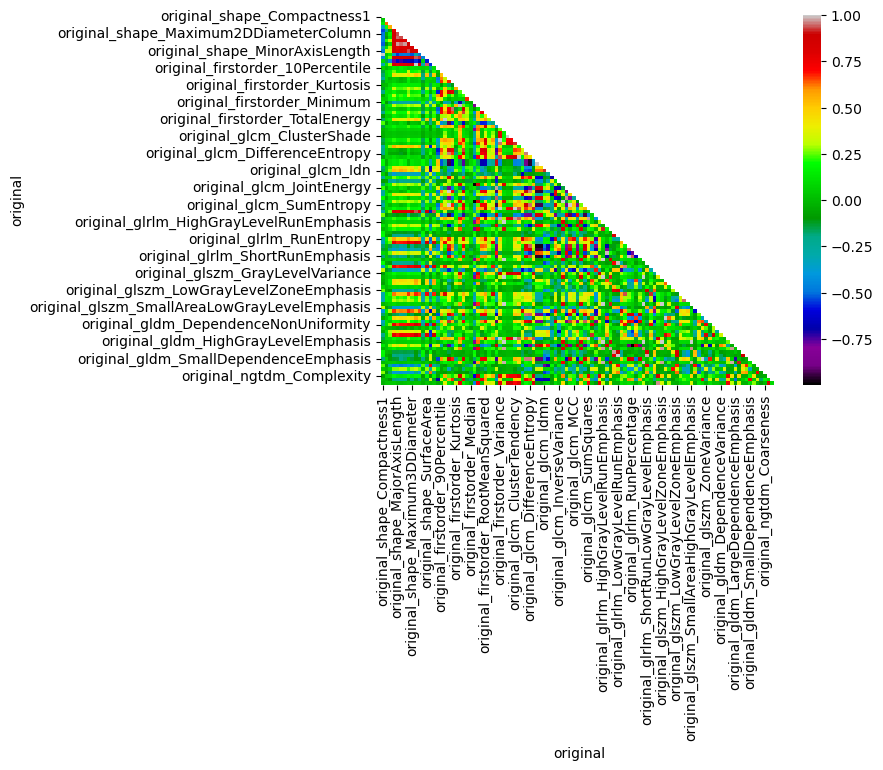

In [82]:
s = sns.heatmap(correlationMatrix.iloc[0:108, 0:108], mask=matrix[0:108, 0:108], cmap="nipy_spectral")
s.set(xlabel=horizontalPrefix, ylabel=verticalPrefix)
# plt.tick_params(labelbottom=False, bottom=False, labeltop=True, top=True)
# s.set_xticklabels(s.get_xticklabels(), rotation=40, ha="right")